# Scatter Plot Visualization Data

Lets Try:

- Put all the LOI's on a single 2D plot
- Each point represents an LOI document
- The coordinates of the point are from some sort of clustering
- The color of the point is the area it was submitted to
- Mouse over gets you some "intersting" metadata:
   - The filename
   - The first 100 characters of text
   - An active link to the PDF

In order to do this we need to generate a bunch of data and write it out in a CSV file.

## Config

In [1]:
n_features = 3000
n_components = 2

## Setup

In [50]:
from config import text_file_info, extra_stopwords

# from collections import defaultdict
from pathlib import Path

# from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import _check_stop_list
# from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import Normalizer
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import numpy as np

stopwords = list(_check_stop_list('english')) + extra_stopwords

## Files

In [6]:
file_by_area = list(text_file_info())

In [14]:
data_filenames = [f[2] for f in file_by_area]
file_names = [f[0] for f in file_by_area]
file_areas = [f[1] for f in file_by_area]

## 2D Coordinates from Text Contents

In [16]:
vectorizer = TfidfVectorizer(input='filename',
                             max_df=0.5, max_features=n_features,
                             min_df=2, stop_words=stopwords,
                             use_idf=True)

In [18]:
%%time
x = vectorizer.fit_transform(data_filenames)

CPU times: user 3.19 s, sys: 646 ms, total: 3.84 s
Wall time: 9.23 s


Now we do the Principle Component Analysis

In [39]:
pca = PCA(n_components)

In [41]:
%%time
loi_coordinates = pca.fit_transform(x.A)

CPU times: user 2.45 s, sys: 2.34 s, total: 4.79 s
Wall time: 685 ms


Lets use `seaborn` to make a plot of this.

In [43]:
document_data = [
    {
        'x': x,
        'y': y,
        'name': str(name),
        'area': str(area),
    }
    for (x, y), name, area in zip(loi_coordinates, file_names, file_areas)
]
document_df = pd.DataFrame(document_data)

In [44]:
document_df

,x,y,name,area
0,-0.085020,-0.059946,SNOWMASS21-AF-TOPIC0-001,AF
1,-0.132219,-0.151580,SNOWMASS21-AF0-015,AF
2,-0.059555,-0.100115,SNOWMASS21-AF0_AF0-091,AF
3,-0.147000,-0.231147,SNOWMASS21-AF0_AF0-215,AF
4,-0.172483,-0.185646,SNOWMASS21-AF0_AF0-229,AF
...,...,...,...,...
1561,-0.017210,-0.096522,SNOWMASS21-UF0_UF0_Garcia-Sciveres-001,UF
1562,-0.015407,-0.083353,SNOWMASS21-UF1_UF4-RF4_RF3_ODonnell-007,UF
1563,0.168456,-0.075036,SNOWMASS21-UF4_UF3-NF5_NF6-CF1_CF0-IF3_IF0-Com...,UF
1564,0.062489,-0.085969,SNOWMASS21-UF6_UF0-NF10_NF0-RF4_RF0-CF1_CF0-IF...,UF


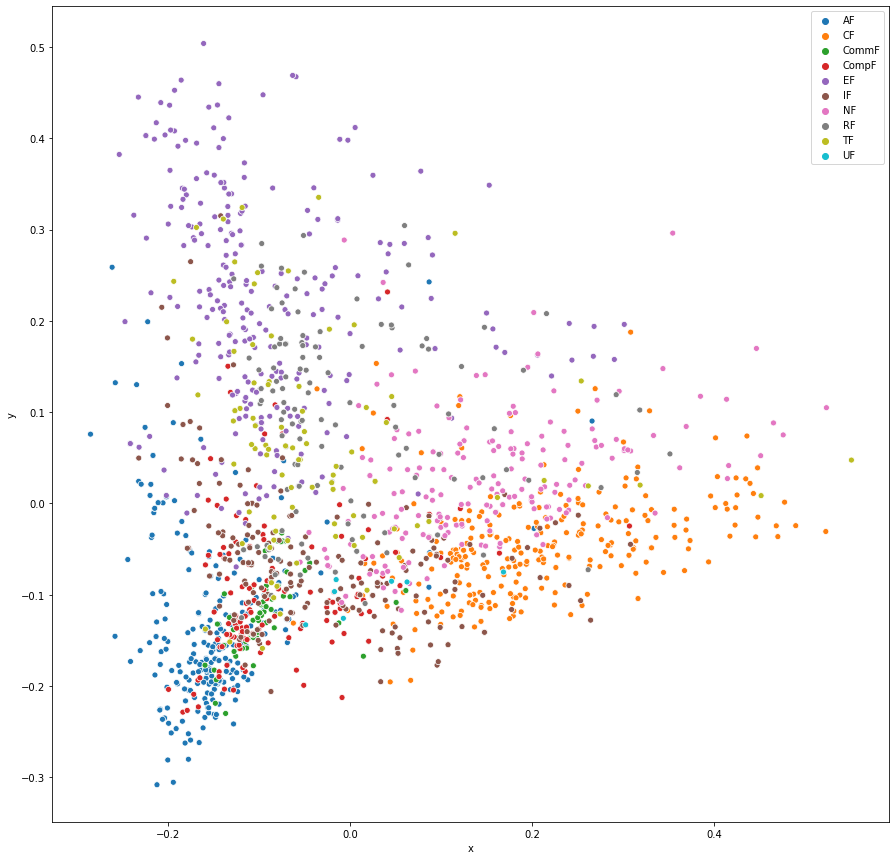

In [52]:
plt.figure(figsize=(15,15))
g = sns.scatterplot(x='x', y='y', hue=document_df.area.to_list(), data=document_df)

## Writing out the data

In [54]:
document_df.to_csv('junk.csv')